# How can we help Sunita Sharma (65+ years  old) to live a healthier and better life?

## We have taken a dataset from UN,
## with the related outcome problems to people over 65,
## and made a cluster to generally define what are the different issues faced by people like Sunita.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


In [26]:
import pandas as pd
df = pd.read_csv("adult.data", sep=",", header=None)
df.to_excel("output.xlsx")

### converting the data input format to csv format to get a better understanding and result

In [45]:
df.head(10)

,0,2,4,10,11,12
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       32561 non-null  int64
 1   2       32561 non-null  int64
 2   4       32561 non-null  int64
 3   10      32561 non-null  int64
 4   11      32561 non-null  int64
 5   12      32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [50]:
df.shape

(32561, 6)

In [65]:
df.drop(df.index[1000:32560],0,inplace=True) 

### dropping extra rows to get an optimum correlation

In [66]:
df.shape

(1000, 6)

In [67]:
df.corr()

,0,2,4,10,11,12
0,1.000000,-0.116499,-0.013483,0.054213,0.065061,0.083820
2,-0.116499,1.000000,-0.054382,0.031688,-0.051067,-0.042644
4,-0.013483,-0.054382,1.000000,0.148023,0.044185,0.234532
10,0.054213,0.031688,0.148023,1.000000,-0.050708,0.132424
11,0.065061,-0.051067,0.044185,-0.050708,1.000000,0.044655
12,0.083820,-0.042644,0.234532,0.132424,0.044655,1.000000


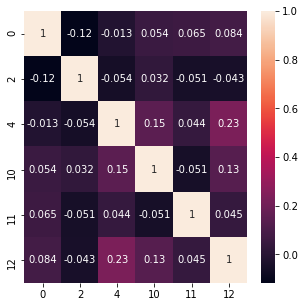

In [68]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True);

### creating heatmap to get a better understanding on how our corr exits

In [69]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df)
    ss.append([k, silhouette_score(df, kmean.labels_)])

sil = pd.DataFrame(ss)

In [70]:
sil

,0,1
0,2,0.588730
1,3,0.552926
2,4,0.572128
3,5,0.574570
4,6,0.564332
5,7,0.573937
6,8,0.557512
7,9,0.546714
8,10,0.544201


###  getting silhouette coefficient and plotting silhouette graph

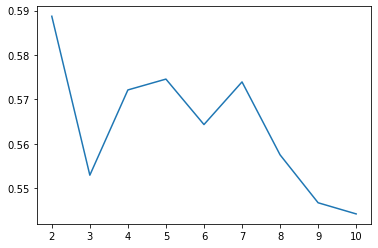

In [71]:
plt.plot(sil[0], sil[1]);

In [72]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [73]:
kmeans.cluster_centers_

array([[3.95835476e+01, 9.66361003e+04, 1.02570694e+01, 5.18028278e+02,
        1.14791774e+02, 4.02827763e+01],
       [3.52400000e+01, 3.96268928e+05, 9.77600000e+00, 6.76856000e+02,
        7.17120000e+01, 3.76160000e+01],
       [3.75473251e+01, 2.15596541e+05, 1.00246914e+01, 6.22234568e+02,
        8.09506173e+01, 4.01316872e+01]])

In [74]:
kmeans.labels_

array([0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0,

In [75]:
df.head()

,0,2,4,10,11,12
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [76]:
df['labels'] = kmeans.labels_
df.head()

,0,2,4,10,11,12,labels
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,2
3,53,234721,7,0,0,40,2
4,28,338409,13,0,0,40,1


In [77]:
df['labels'].value_counts()

2    487
0    388
1    125
Name: labels, dtype: int64

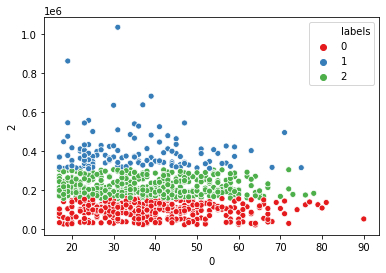

In [80]:
sns.scatterplot(x=0, y=2, hue= 'labels', data=df, palette='Set1')

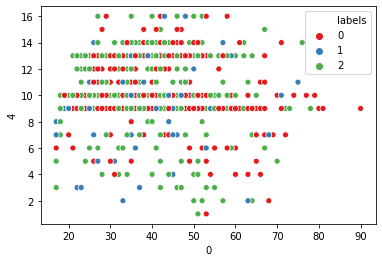

In [81]:
sns.scatterplot(x=0, y=4, hue= 'labels', data=df, palette='Set1')

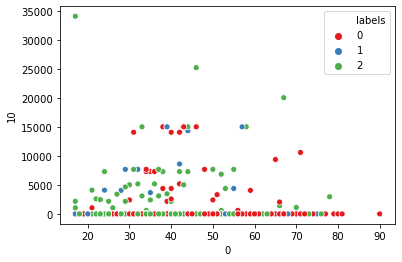

In [82]:
sns.scatterplot(x=0, y=10, hue= 'labels', data=df, palette='Set1')

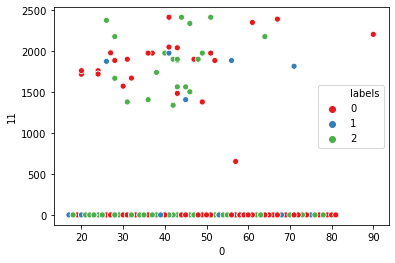

In [83]:
sns.scatterplot(x=0, y=11, hue= 'labels', data=df, palette='Set1')

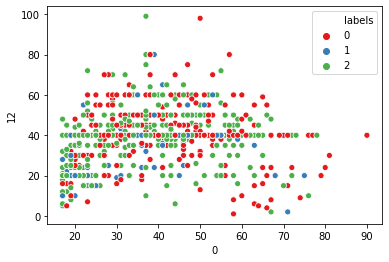

In [84]:
sns.scatterplot(x=0, y=12, hue= 'labels', data=df, palette='Set1')

In [88]:
df.head()

,0,2,4,10,11,12,labels
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,2
3,53,234721,7,0,0,40,2
4,28,338409,13,0,0,40,1


### As we have seperated people with different issues with different groups we can focus on the problem of simple people with similar problems at once and help not just sunita but other personalities in that condition